# 온도에 따른 오존량 예측

In [2]:
from scipy import stats
import pandas as pd

# 1973년 뉴욕의 공기의 질을 측정한 데이터셋
# 회귀분석 예제2 : 오존 데이터셋(온도에 따른 오존량 예측)
# 독립변수: 온도, 종속변수: 오존량
# 귀무가설 : 온도가 오존량에 영향을 미치지 않는다.
# 대립가설 : 온도가 오존량에 영향을 미친다.

# csv 파일을 로딩
df = pd.read_csv("c:/data/ozone/ozone.csv")

# 데이터의 컬럼명 변경
print(df.head())

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5


In [3]:
# 결측값이 있는 행 제거
df2=df.dropna(axis=0)
df2.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
6,23.0,299.0,8.6,65,5,7


In [4]:
# 기울기(slope), 절편(intercept), 상관계수(rvalue), p-value(예측 불확실성의 정도를 나타내는 값)
# 에러의 표준편차(stderr)
# p-value는 0.05 미만일 때 통계적으로 유의함
x2 = df2["Temp"].values

In [5]:
print(x2)
y2 = df2["Ozone"].values
print(y2)

[67 72 74 62 65 59 61 69 66 68 58 64 66 57 68 62 59 73 61 61 67 81 79 76
 82 90 87 82 77 72 65 73 76 84 85 81 83 83 88 92 92 89 73 81 80 81 82 84
 87 85 74 86 85 82 86 88 86 83 81 81 81 82 89 90 90 86 82 80 77 79 76 78
 78 77 72 79 81 86 97 94 96 94 91 92 93 93 87 84 80 78 75 73 81 76 77 71
 71 78 67 76 68 82 64 71 81 69 63 70 75 76 68]
[ 41.  36.  12.  18.  23.  19.   8.  16.  11.  14.  18.  14.  34.   6.
  30.  11.   1.  11.   4.  32.  23.  45. 115.  37.  29.  71.  39.  23.
  21.  37.  20.  12.  13. 135.  49.  32.  64.  40.  77.  97.  97.  85.
  10.  27.   7.  48.  35.  61.  79.  63.  16.  80. 108.  20.  52.  82.
  50.  64.  59.  39.   9.  16. 122.  89. 110.  44.  28.  65.  22.  59.
  23.  31.  44.  21.   9.  45. 168.  73.  76. 118.  84.  85.  96.  78.
  73.  91.  47.  32.  20.  23.  21.  24.  44.  21.  28.   9.  13.  46.
  18.  13.  24.  16.  13.  23.  36.   7.  14.  30.  14.  18.  20.]


In [6]:
result=stats.linregress(x2, y2)
result
# 모형의 적합도 : R2값이 0이 아니므로 추정하는 회귀함수가 유의미하다.
# R2 값이 0.69 이 모델은 69%의 설명력이 있음
# 귀무가설 : 온도가 오존량에 영향을 미치지 않는다.
# 대립가설 : 온도가 오존량에 영향을 미친다.
# p_value : 1.552677229392932e-17는 0.05보다 작으므로 통계적으로 유의함
# 따라서 귀무가설을 기각하고 대립가설을 채택한다.
# 결론 : 온도가 오존량에 영향을 미친다.


LinregressResult(slope=2.439109905529362, intercept=-147.64607238059494, rvalue=0.6985414096486389, pvalue=1.552677229392932e-17, stderr=0.23931937849409174, intercept_stderr=18.755251765306646)

Text(0, 0.5, 'Ozone')

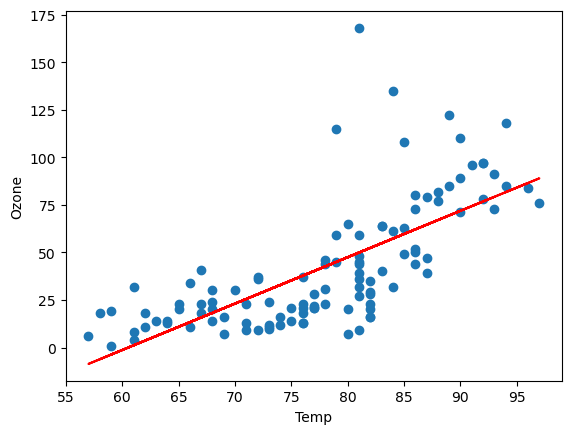

In [7]:
import matplotlib.pyplot as plt

slope, intercept, r_value, p_value, stderr = stats.linregress(x2, y2)
# 산점도 그리기
plt.scatter(x2,y2)
# 회귀선 그리기
plt.plot(x2, slope*x2 +intercept, c="red")
plt.xlabel("Temp")
plt.ylabel("Ozone")

In [8]:
# 온도가 화씨 80도일 때 오존량 예측
80 * slope + intercept 

47.48272006175401

# 붓꽃 품종

In [9]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import datasets

In [ ]:
# 붓꽃 데이터 로딩
iris = datasets.load_iris()
print(iris)

In [11]:
#변수명 확인
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [12]:
# SepalWidth(꽃받침의 너비)로 SepalLength(꽃받침의 길이)를 예측
# 귀무가설 : 꽃받침의 너비와 꽃받침의 길이는 상관관계가 없다.
# 대립가설 : 꽃받침의 너비와 꽃받침의 길이는 상관관계가 있다.
X = iris.data[:, 1]
y = iris.data[:, 0]

In [13]:
result=stats.linregress(X, y)
result
# p-value가 0.05보다 크므로 모델이 유의하지는 않음, 모델의 설명력-11.7%
# 결론 : 꽃받침의 너비와 꽃받침의 길이는 상관관계가 없다.

LinregressResult(slope=-0.2233610611298999, intercept=6.526222550894481, rvalue=-0.11756978413300208, pvalue=0.15189826071144782, stderr=0.15508092994240763, intercept_stderr=0.4788963398440871)

Text(0, 0.5, 'SepalLength')

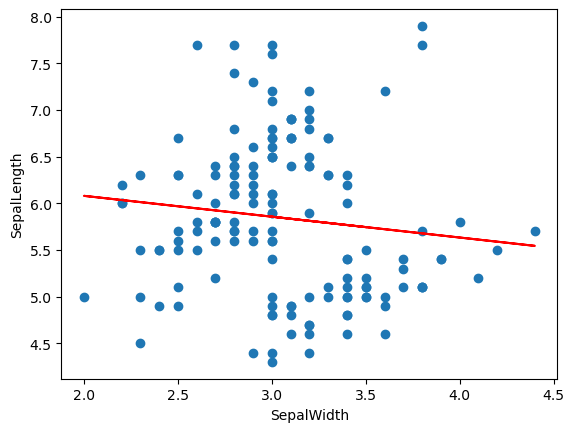

In [14]:
slope, intercept, r_value, p_value, stderr = stats.linregress(X, y)
x1 = np.array(X)
# 산점도 그리기
plt.scatter(X,y)
# 회귀선 그리기
plt.plot(x1, slope*x1 +intercept, c="red")
plt.xlabel("SepalWidth")
plt.ylabel("SepalLength")

In [15]:
# Petal.Width(꽃잎의 너비)로 Petal.Length(꽃잎의 길이)를 예측
# 귀무가설 : 꽃잎의 너비와 꽃잎의 길이는 상관관계가 없다.
# 대립가설 : 꽃잎의 너비와 꽃잎의 길이는 상관관계가 있다.
X = iris.data[:, 3]
y = iris.data[:, 2]

In [16]:
result=stats.linregress(X, y)
result
# p-value가 0.05보다 작으므로 모델이 유의함, 모델의 설명력 96.2%
# 결론 : 꽃잎의 너비와 꽃잎의 길이는 강한 양의 상관관계가 있다.

LinregressResult(slope=2.229940495121865, intercept=1.08355803285051, rvalue=0.9628654314027963, pvalue=4.6750039073255014e-86, stderr=0.0513962314651412, intercept_stderr=0.07296696269883872)

Text(0, 0.5, 'SepalLength')

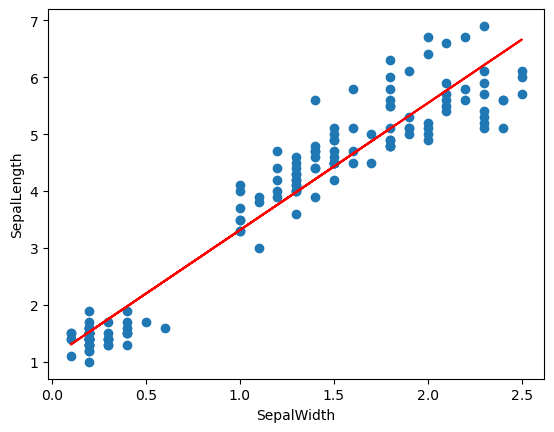

In [17]:
slope, intercept, r_value, p_value, stderr = stats.linregress(X, y)
x1 = np.array(X)
# 산점도 그리기
plt.scatter(X,y)
# 회귀선 그리기
plt.plot(x1, slope*x1 +intercept, c="red")
plt.xlabel("SepalWidth")
plt.ylabel("SepalLength")

# 항공운항 지연 시간 예측

In [18]:
# 항공운항 데이터셋
# 분석할 필드가 적은 편
# 로딩 시간이 많이 걸려서 가장 레코드수가 적은 1987년 데이터로 실습

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("c:/data/airline/1987.csv")
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1987,10,14,3,741.0,730,912.0,849,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1987,10,15,4,729.0,730,903.0,849,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1987,10,17,6,741.0,730,918.0,849,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1987,10,18,7,729.0,730,847.0,849,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1987,10,19,1,749.0,730,922.0,849,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311826 entries, 0 to 1311825
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1311826 non-null  int64  
 1   Month              1311826 non-null  int64  
 2   DayofMonth         1311826 non-null  int64  
 3   DayOfWeek          1311826 non-null  int64  
 4   DepTime            1292141 non-null  float64
 5   CRSDepTime         1311826 non-null  int64  
 6   ArrTime            1288326 non-null  float64
 7   CRSArrTime         1311826 non-null  int64  
 8   UniqueCarrier      1311826 non-null  object 
 9   FlightNum          1311826 non-null  int64  
 10  TailNum            0 non-null        float64
 11  ActualElapsedTime  1288326 non-null  float64
 12  CRSElapsedTime     1311826 non-null  int64  
 13  AirTime            0 non-null        float64
 14  ArrDelay           1288326 non-null  float64
 15  DepDelay           1292141 non-n

In [4]:
df2=df.loc[:, ["Distance","DepDelay","ArrDelay"]]

In [5]:
df2.shape

(1311826, 3)

In [6]:
#결측값 제거
df3=df2.dropna(axis=0)

In [7]:
df3.shape

(1287333, 3)

In [8]:
X = df3["Distance"] # 운항거리
y = df3["DepDelay"] # 출발지연시간
print(X.head())
print(y.head())

0    447.0
1    447.0
2    447.0
3    447.0
4    447.0
Name: Distance, dtype: float64
0    11.0
1    -1.0
2    11.0
3    -1.0
4    19.0
Name: DepDelay, dtype: float64


In [9]:
# 단순회귀분석
# 기울기(slope), 절편(intercept), 상관계수(rvalue), p-value(예측 불확실성의 정도를 나타내는 값)
# 에러의 표준편차(stderr)
# p-value는 0.05 미만일 때 통계적으로 유의함
x2 = df3["Distance"].values
y2 = df3["DepDelay"].values
result=stats.linregress(x2, y2)
result

LinregressResult(slope=0.002611912591979618, intercept=6.423342199979843, rvalue=0.05505749093590335, pvalue=0.0, stderr=4.174821057208909e-05, intercept_stderr=0.03228016116351335)

Text(0, 0.5, 'DepDelay')

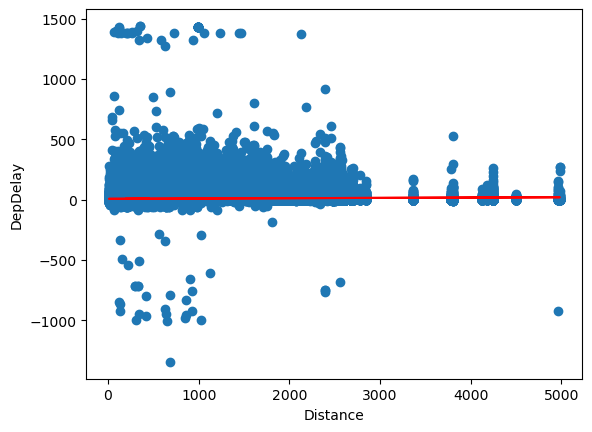

In [10]:
slope, intercept, r_value, p_value, stderr = stats.linregress(x2, y2)
# 산점도 그리기
plt.scatter(x2,y2)
# 회귀선 그리기
plt.plot(x2, slope*x2 +intercept, c="red")
plt.xlabel("Distance")
plt.ylabel("DepDelay")

In [11]:
# 단순회귀분석
# 기울기(slope), 절편(intercept), 상관계수(rvalue), p-value(예측 불확실성의 정도를 나타내는 값)
# 에러의 표준편차(stderr)
# p-value는 0.05 미만일 때 통계적으로 유의함
x2 = df3["Distance"].values
y2 = df3["ArrDelay"].values
result=stats.linregress(x2, y2)
result

LinregressResult(slope=0.0021049954132008894, intercept=8.200779337409747, rvalue=0.040634730319007245, pvalue=0.0, stderr=4.5619425571776195e-05, intercept_stderr=0.03527342584183359)

Text(0, 0.5, 'ArrDelay')

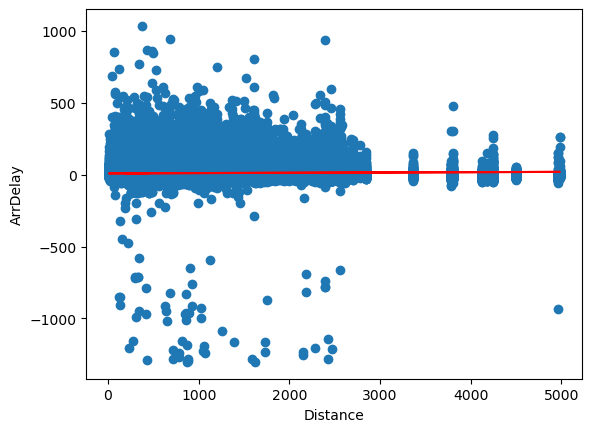

In [13]:
slope, intercept, r_value, p_value, stderr = stats.linregress(x2, y2)
#산점도 그리기
plt.scatter(x2,y2)
#회귀선 그리기
plt.plot(x2, slope*x2 +intercept, c="red")
plt.xlabel("Distance")
plt.ylabel("ArrDelay")

# 와인 품질 예측

In [21]:
# 와인데이터셋
# https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/
import pandas as pd
df = pd.read_csv("c:/data/wine/winequality-red.csv",sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
x = df["alcohol"].values
print(x)
y = df["density"].values
print(y)

[ 9.4  9.8  9.8 ... 11.  10.2 11. ]
[0.9978  0.9968  0.997   ... 0.99574 0.99547 0.99549]


In [23]:
from scipy import stats

result=stats.linregress(x, y)
result
# 모형의 적합도 : rvalue가 0이 아니므로 추정하는 회귀함수가 유의미하다.
# rvalue : -0.496
# 귀무가설 : 알코올 농도는 와인의 평균밀도에 영향을 미치지 않는다.
# 대립가설 : 알코올 농도는 와인의 평균밀도에 영향을 미친다.
# p_value : 0.05보다 작으므로 통계적으로 유의함
# 따라서 귀무가설을 기각하고 대립가설을 채택
# 결론 : 알코올 농도는 와인의 평균밀도에 영향을 미친다.

LinregressResult(slope=-0.0008787514451397319, intercept=1.005905890648971, rvalue=-0.49617977024170185, pvalue=3.938835339987705e-100, stderr=3.8477268198532086e-05, intercept_stderr=0.0004031373291835014)

Text(0, 0.5, '와인의 밀도')

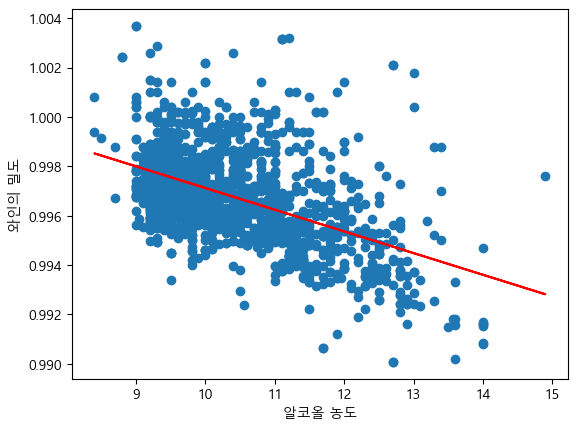

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
# 한글 처리를 위해 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

slope, intercept, r_value, p_value, stderr = stats.linregress(x, y)
# 산점도 그리기
plt.scatter(x,y)
# 회귀선 그리기
plt.plot(x, slope*x +intercept, c="red")
plt.xlabel("알코올 농도")
plt.ylabel("와인의 밀도")